In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
open_meteo = pd.read_csv("../data/OPENMETEO/clima.csv")

In [3]:
open_meteo.index = pd.to_datetime(open_meteo["date"])

In [4]:
traducao = {
    "temperature_2m": "Temperatura",
    "relative_humidity_2m": "Umidade Relativa",
    "dew_point_2m": "Ponto de Orvalho",
    "apparent_temperature": "Temperatura Aparente",
    "rain": "Chuva",
    "wind_speed_10m": "Velocidade do Vento",
    "cloud_cover": "Cobertura de Nuvens",
    "wind_gusts_10m": "Rajadas de Vento"
}
open_meteo.rename(columns=traducao, inplace=True)

In [5]:
open_meteo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1963584 entries, 2017-01-01 00:00:00+00:00 to 2024-12-31 23:00:00+00:00
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   date                  object 
 1   Temperatura           float64
 2   Umidade Relativa      float64
 3   Ponto de Orvalho      float64
 4   Temperatura Aparente  float64
 5   Chuva                 float64
 6   Velocidade do Vento   float64
 7   weather_code          float64
 8   Cobertura de Nuvens   float64
 9   Rajadas de Vento      float64
 10  km                    int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 179.8+ MB


In [6]:
open_meteo.describe()

,Temperatura,Umidade Relativa,Ponto de Orvalho,Temperatura Aparente,Chuva,Velocidade do Vento,weather_code,Cobertura de Nuvens,Rajadas de Vento,km
count,1.963584e+06,1.963584e+06,1.963584e+06,1.963584e+06,1.963584e+06,1.963584e+06,1.963584e+06,1.963584e+06,1.963584e+06,1.963584e+06
mean,2.090997e+01,8.339000e+01,1.781135e+01,2.273134e+01,1.951011e-01,9.213057e+00,1.591519e+01,6.564305e+01,2.358236e+01,1.675000e+02
std,4.201428e+00,1.178321e+01,4.144668e+00,5.884437e+00,7.619352e-01,5.245874e+00,2.309196e+01,3.801048e+01,1.228352e+01,4.038875e+01
min,3.530000e+00,2.653368e+01,-6.377500e+00,2.657585e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.080000e+00,1.000000e+02
25%,1.814050e+01,7.582818e+01,1.544550e+01,1.884558e+01,0.000000e+00,5.241679e+00,1.000000e+00,2.900000e+01,1.404000e+01,1.337500e+02
50%,2.107400e+01,8.577846e+01,1.824050e+01,2.281890e+01,0.000000e+00,8.145870e+00,3.000000e+00,8.600000e+01,2.160000e+01,1.675000e+02
75%,2.374750e+01,9.296649e+01,2.084300e+01,2.678812e+01,1.000000e-01,1.224529e+01,5.100000e+01,1.000000e+02,3.060000e+01,2.012500e+02
max,3.778000e+01,1.000000e+02,2.969450e+01,4.522615e+01,6.520000e+01,5.737117e+01,6.500000e+01,1.000000e+02,1.382400e+02,2.350000e+02


In [7]:
# Definir o tema personalizado
sns.set_theme(
    style="whitegrid",
    palette="dark",
    font='sans-serif',
    font_scale=1.3,
    rc={
        "axes.spines.right": False,
        "axes.spines.top": False,
        "figure.figsize": (10, 6),
        "axes.facecolor": "white",
        "figure.facecolor": "white",
        "text.color": "black",           # Cor padrão do texto
        "axes.labelcolor": "black",      # Cor dos rótulos dos eixos
        "xtick.color": "black",          # Cor dos ticks do eixo x
        "ytick.color": "black",          # Cor dos ticks do eixo y
        "axes.titlecolor": "black",      # Cor do título dos eixos
    }
)

# Aumentar a resolução das figuras
%config InlineBackend.figure_format = 'retina'

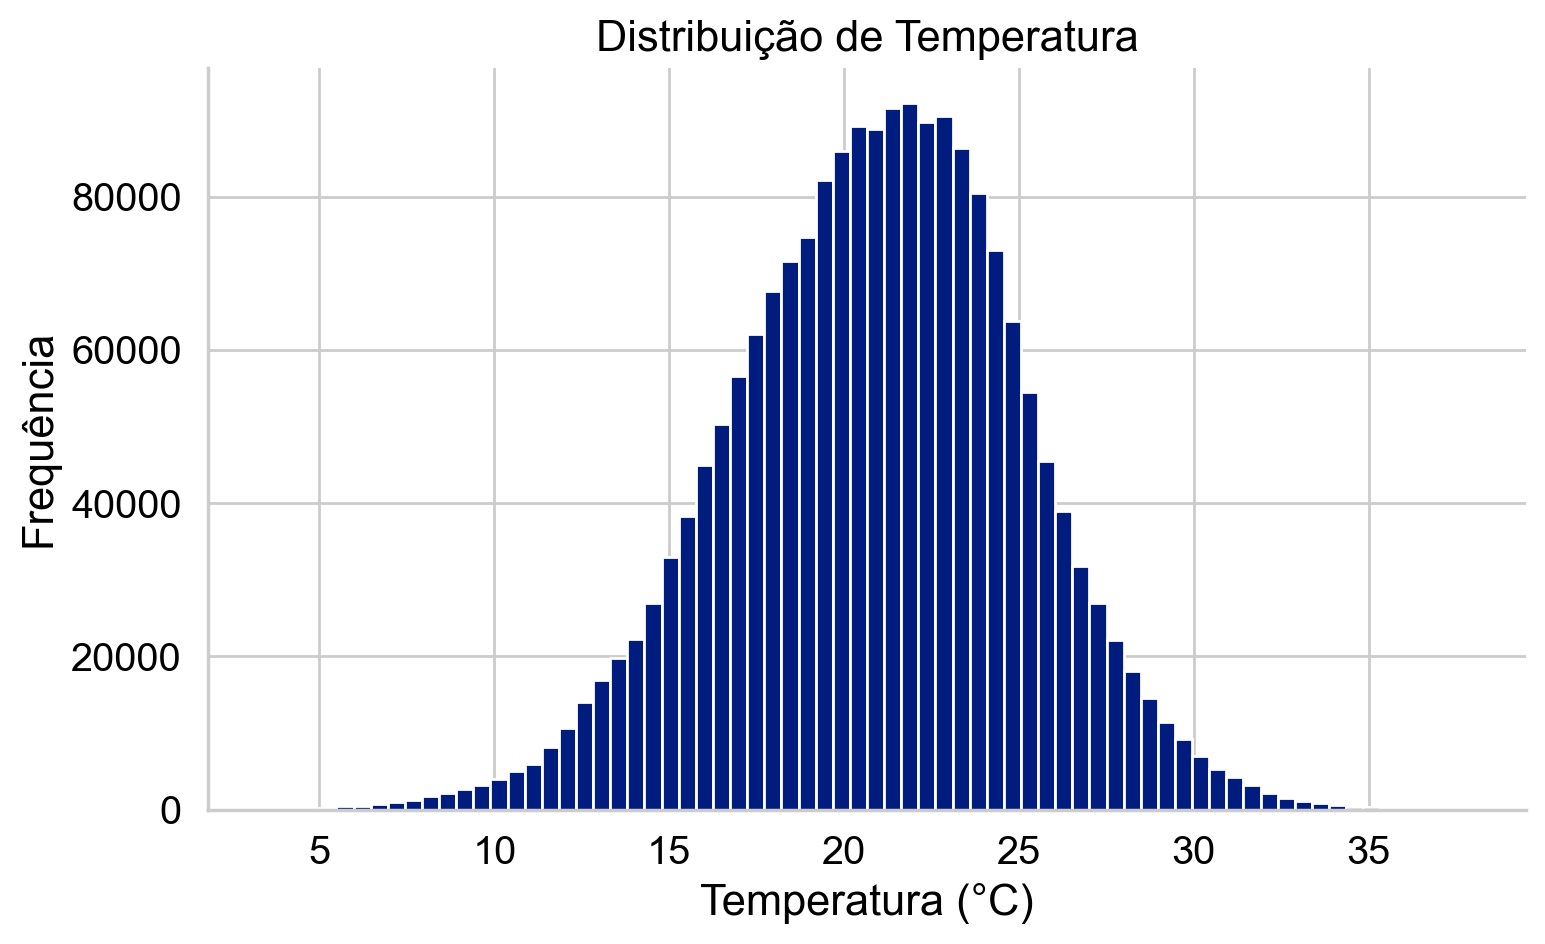

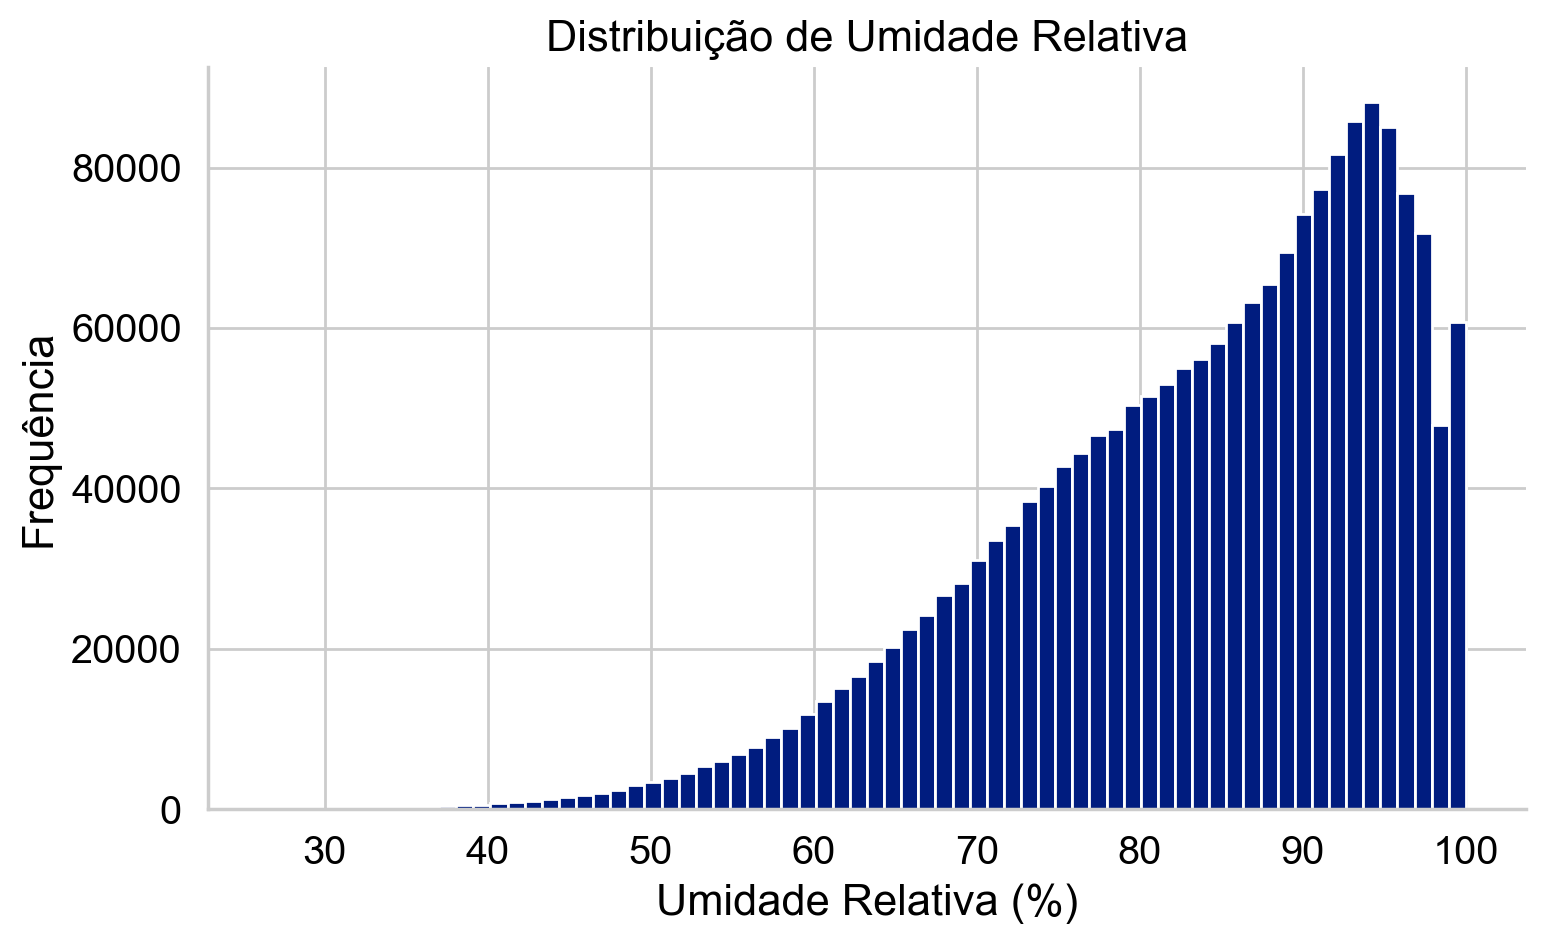

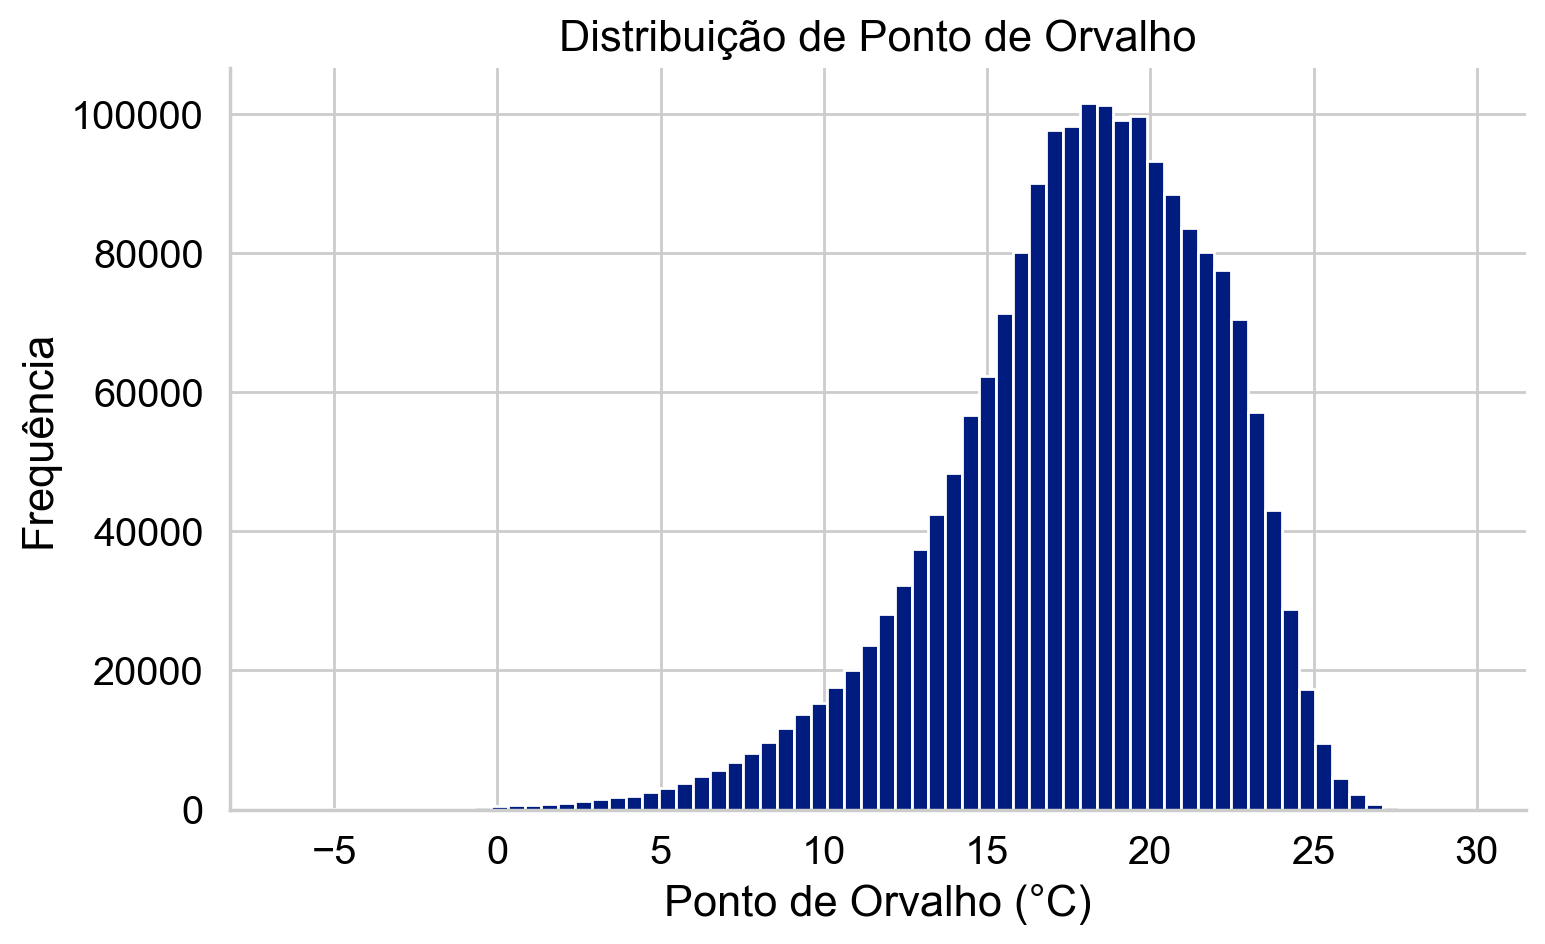

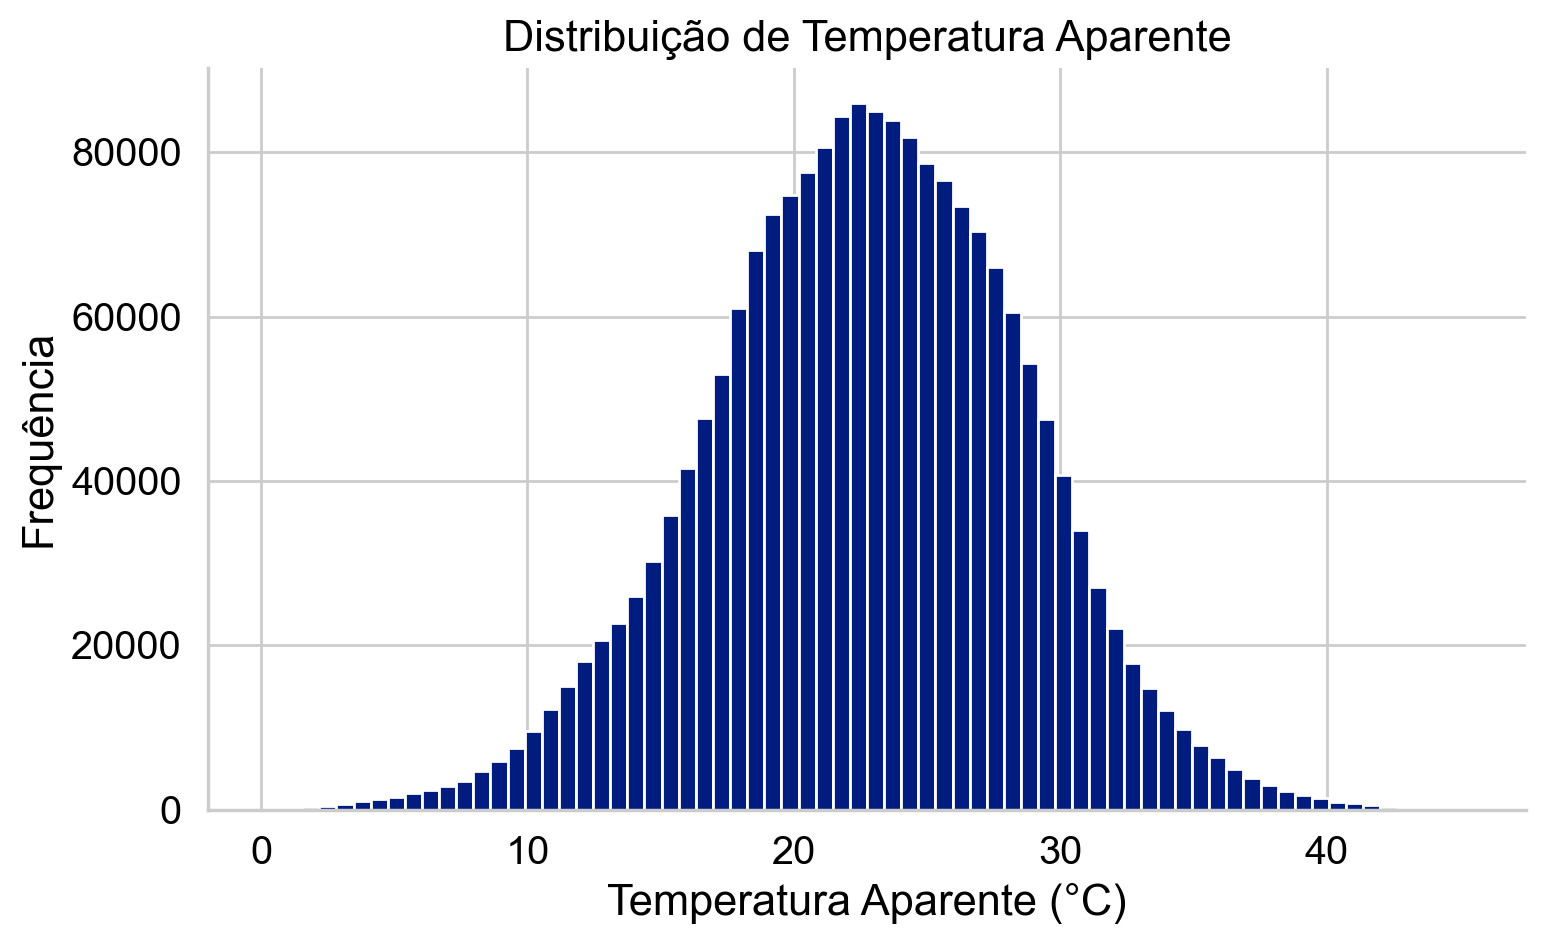

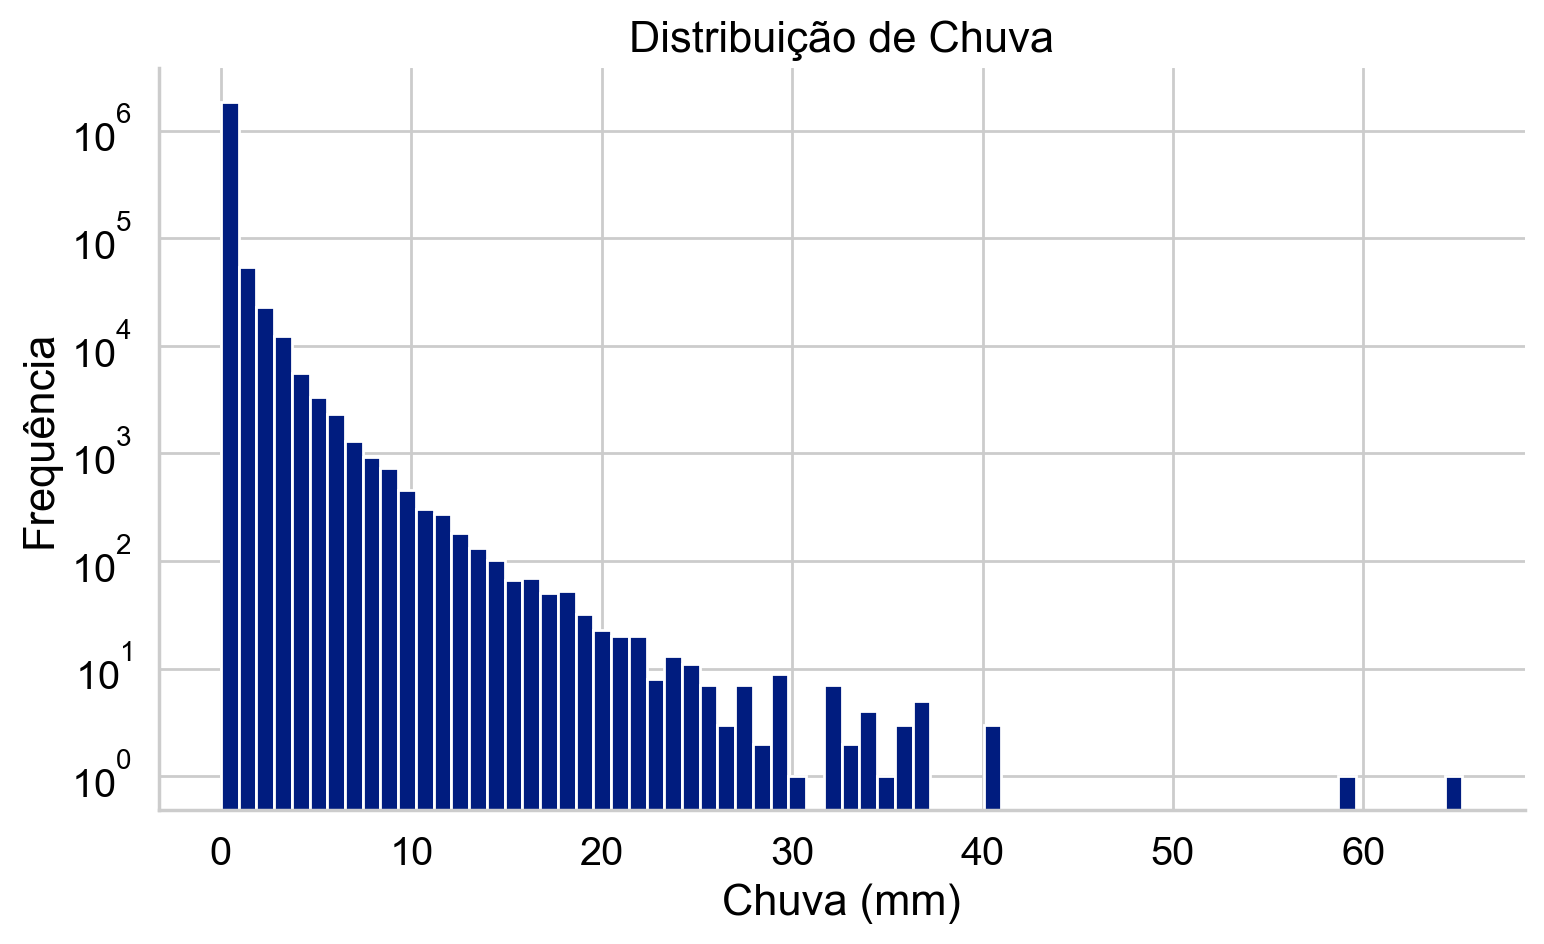

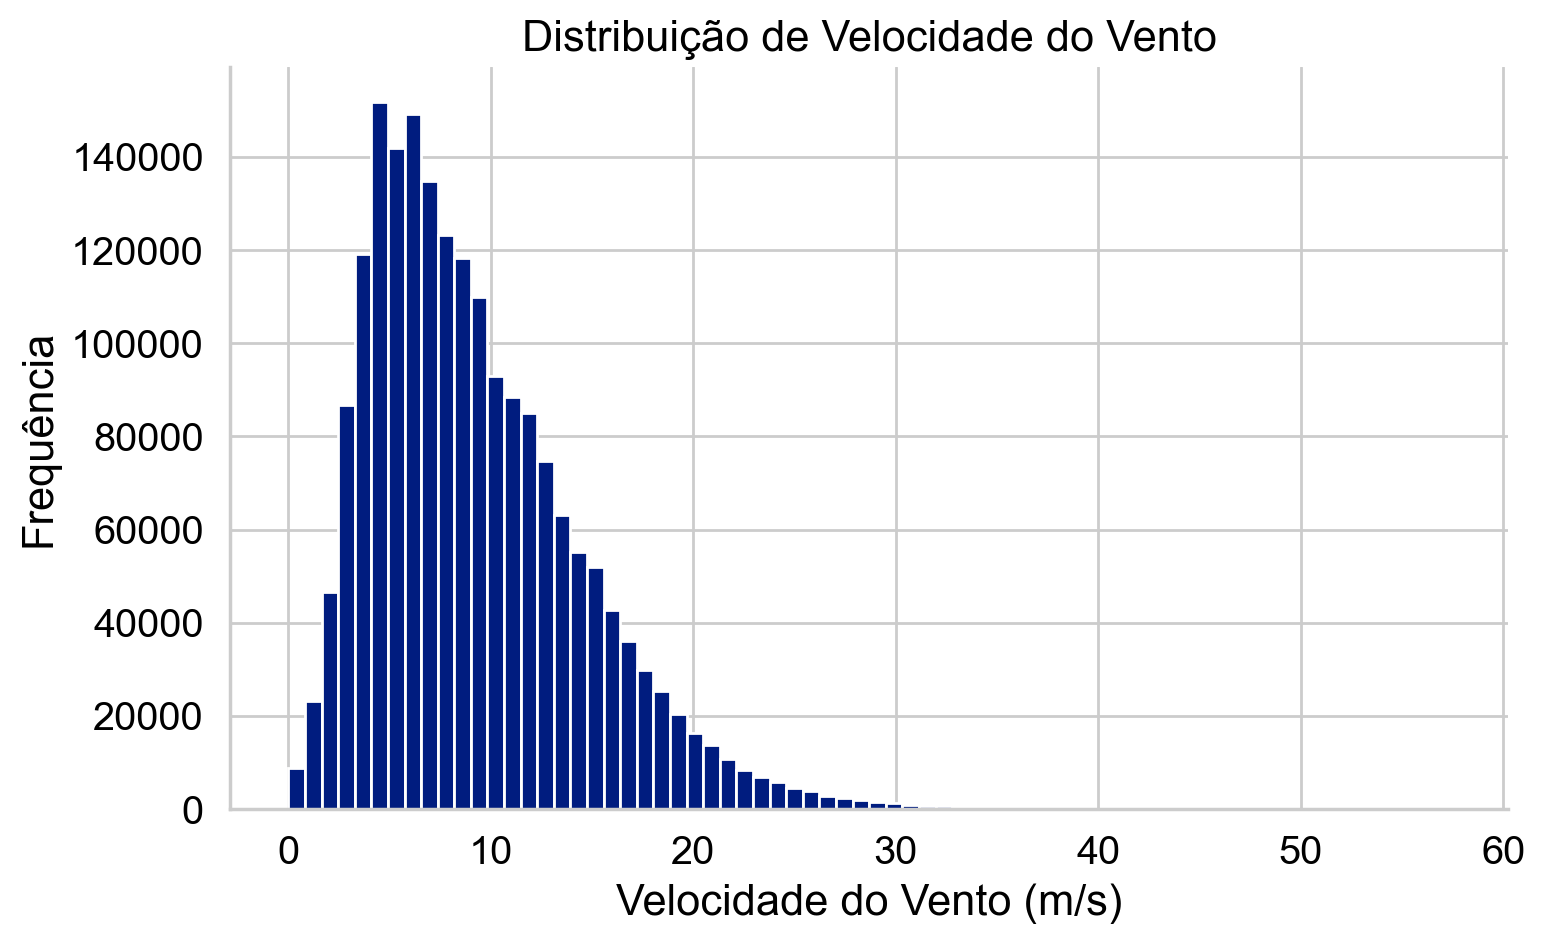

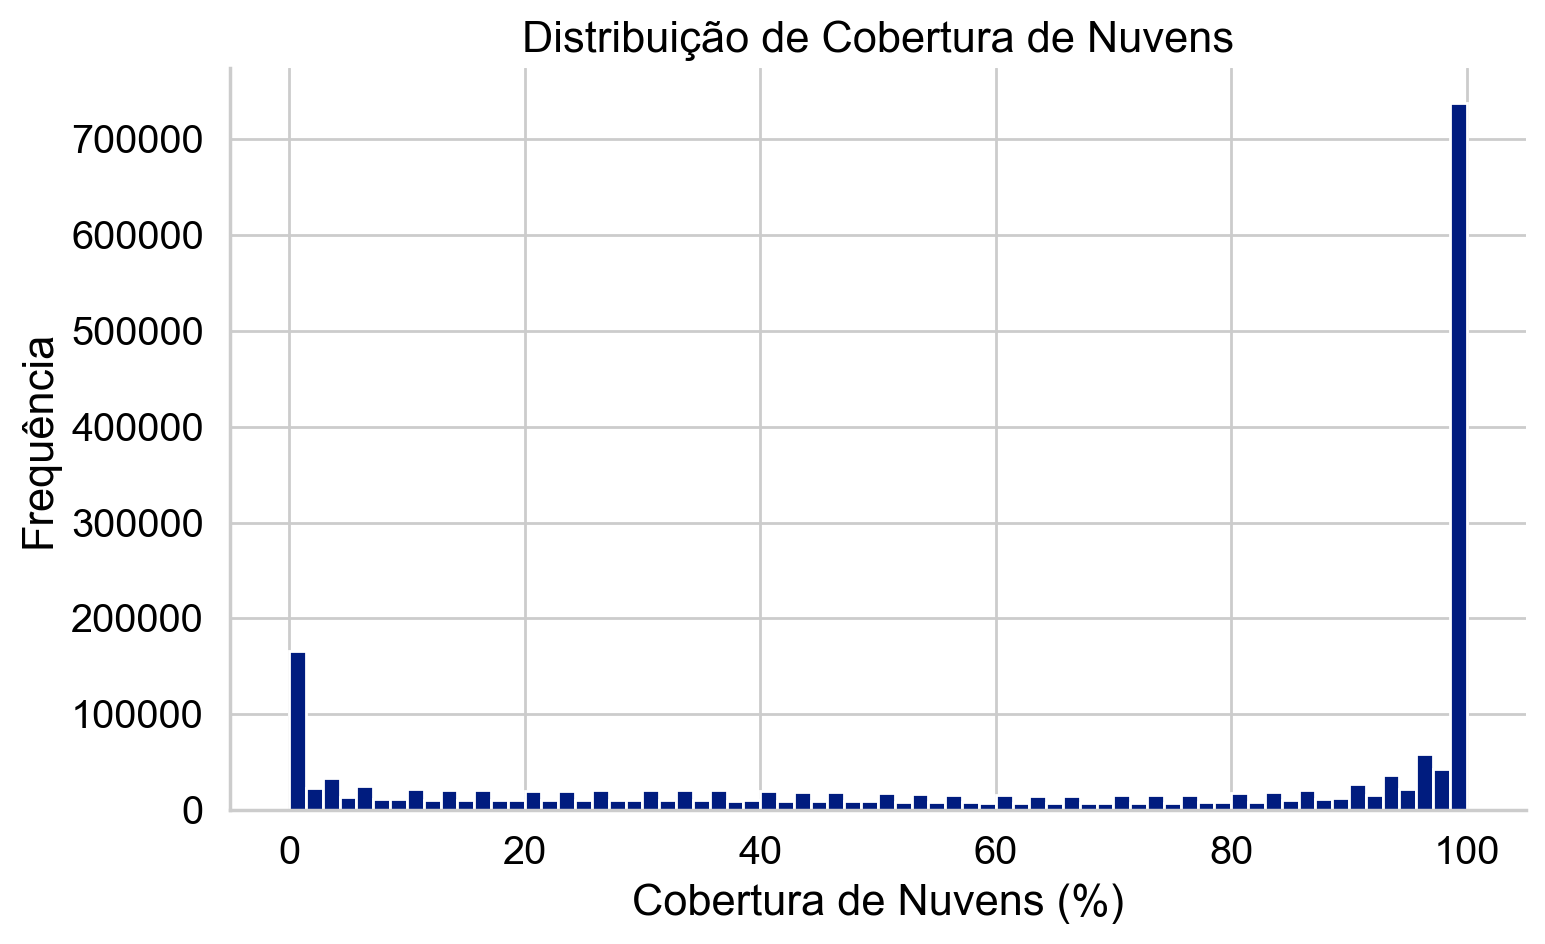

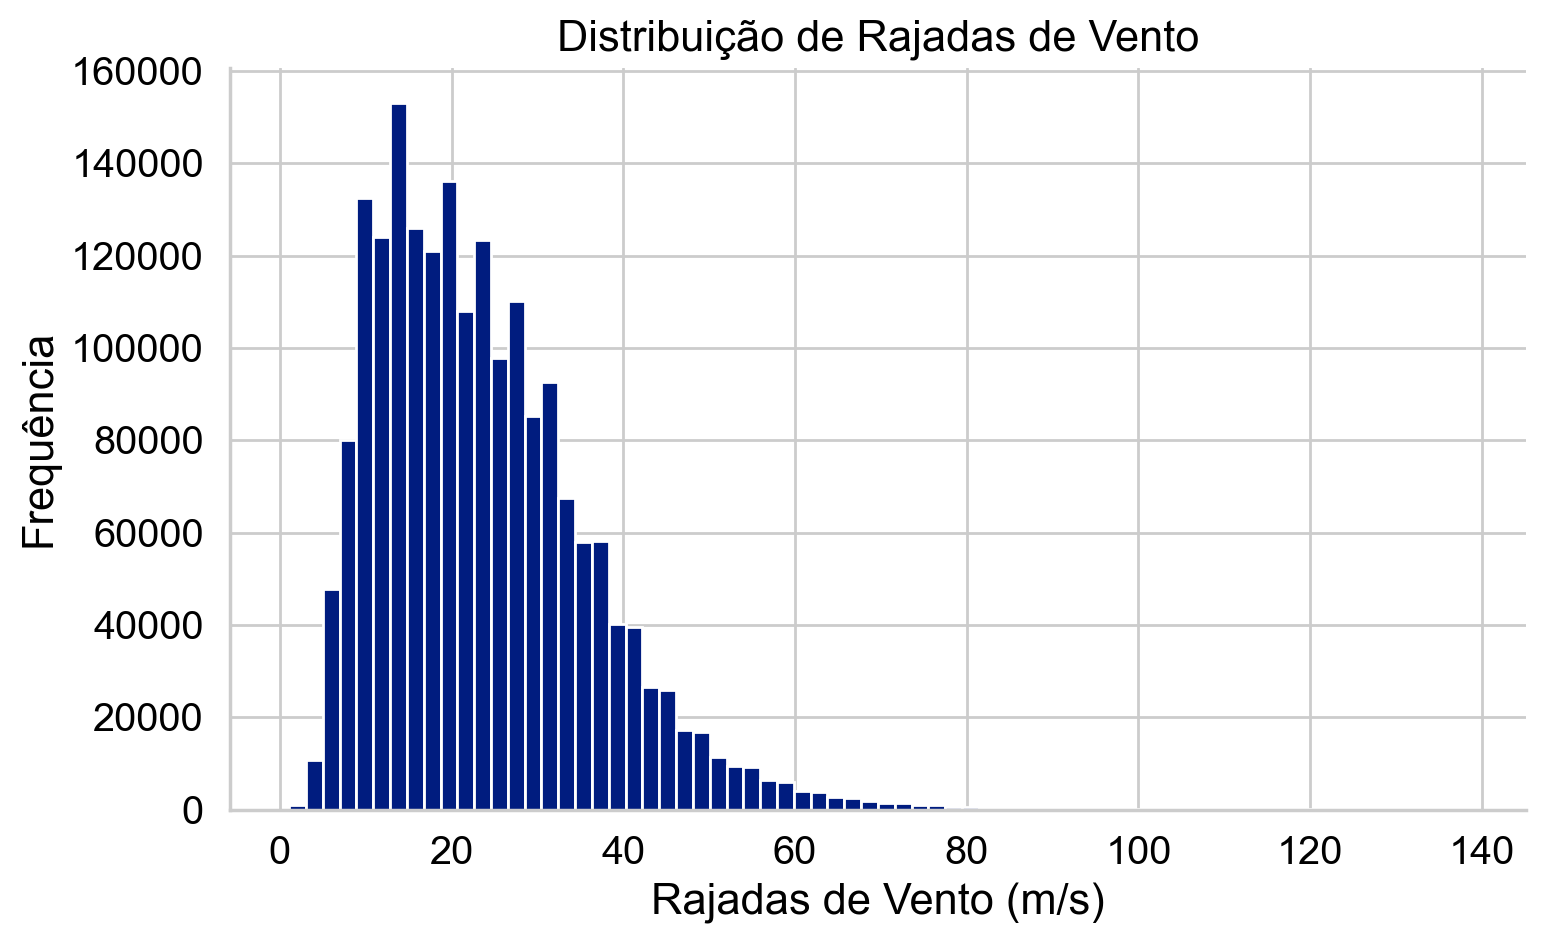

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que você tenha um DataFrame chamado 'df' com as variáveis mencionadas

variaveis = {
    "Temperatura": "°C",
    "Umidade Relativa": "%",
    "Ponto de Orvalho": "°C",
    "Temperatura Aparente": "°C",
    "Chuva": "mm",
    "Velocidade do Vento": "m/s",
    "Cobertura de Nuvens": "%",
    "Rajadas de Vento": "m/s"
}

for var, medida in variaveis.items():
    plt.figure(figsize=(8, 5))
    open_meteo[var].plot(kind='hist', bins=70)
    plt.title(f"Distribuição de {var}")
    plt.xlabel(f"{var} ({medida})")
    plt.ylabel("Frequência")
    if var == "Chuva":
        plt.yscale('log')
    plt.tight_layout()
    plt.savefig(f"../imgs/distribuicao_{var}.pdf")
    plt.show()

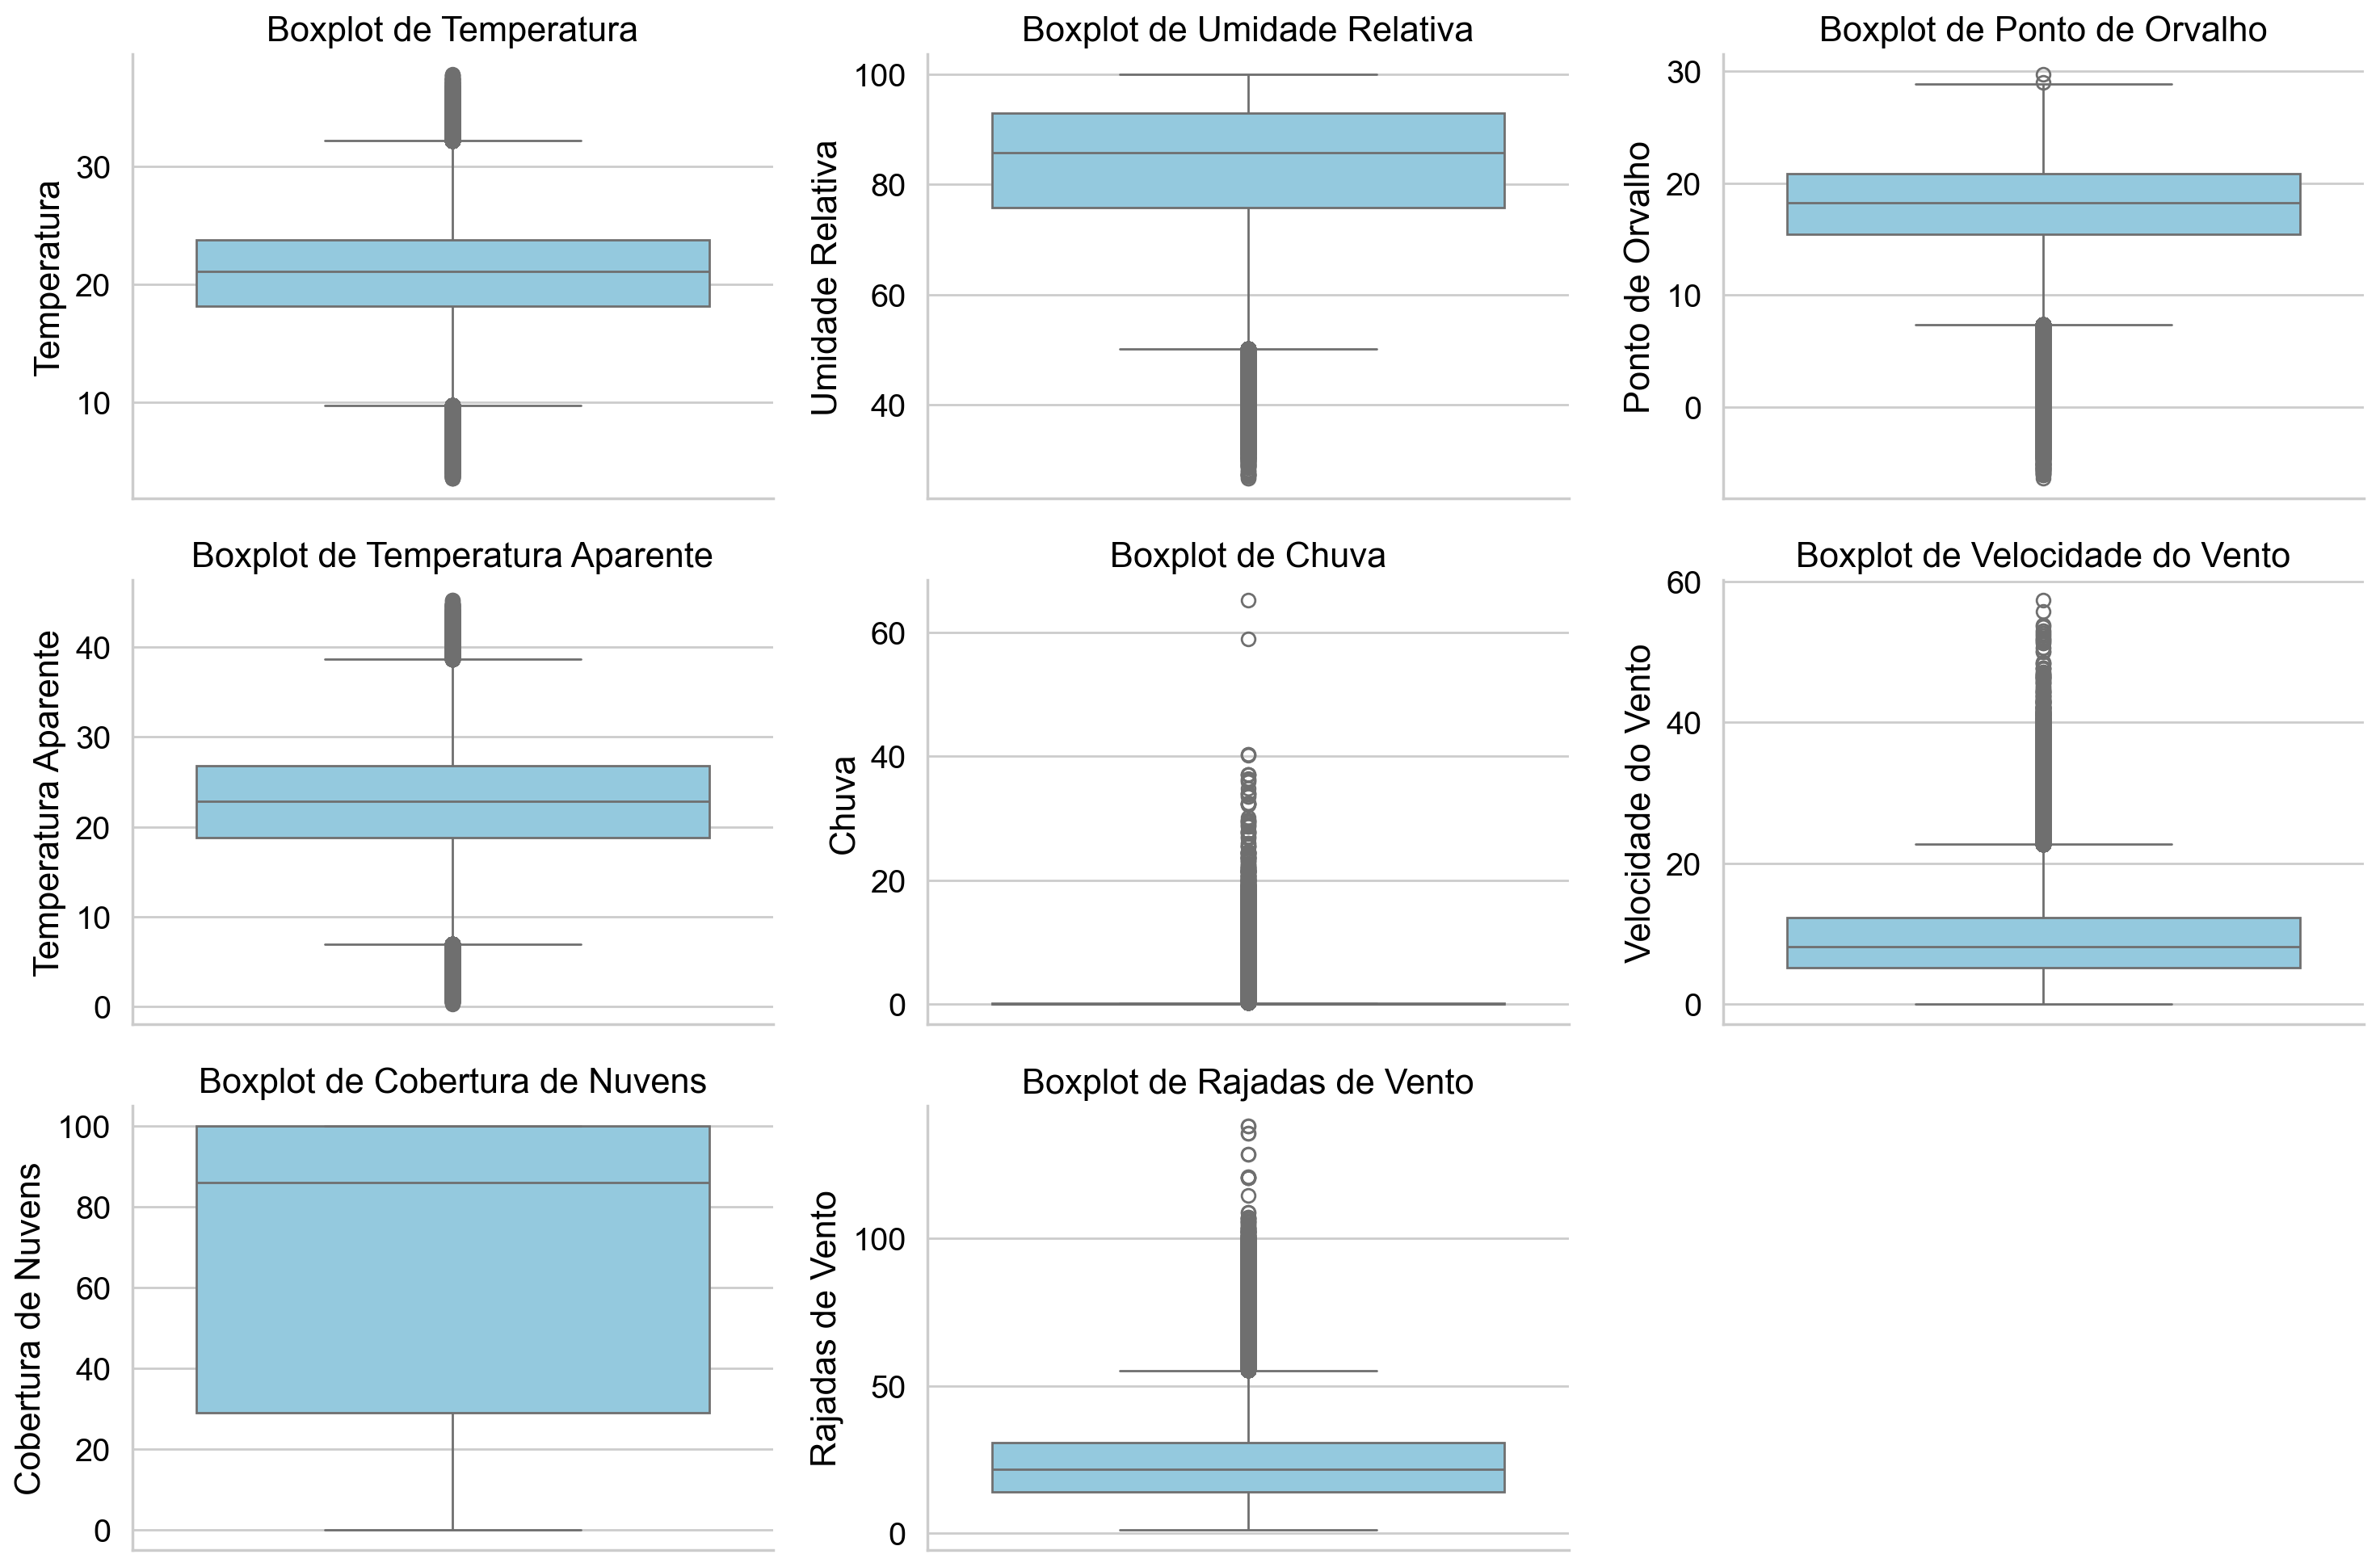

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definindo o tamanho dos gráficos
plt.figure(figsize=(15, 10))

# Gerar um boxplot para cada variável
for i, var in enumerate(variaveis, 1):
    plt.subplot(3, 3, i)  # 3 linhas e 3 colunas
    sns.boxplot(data=open_meteo, y=var, color='skyblue')
    plt.title(f"Boxplot de {var}")
    plt.xlabel("")  # Sem rótulo no eixo x para ficar mais limpo
    plt.ylabel(var)

# Ajustar o layout
plt.tight_layout()
plt.show()


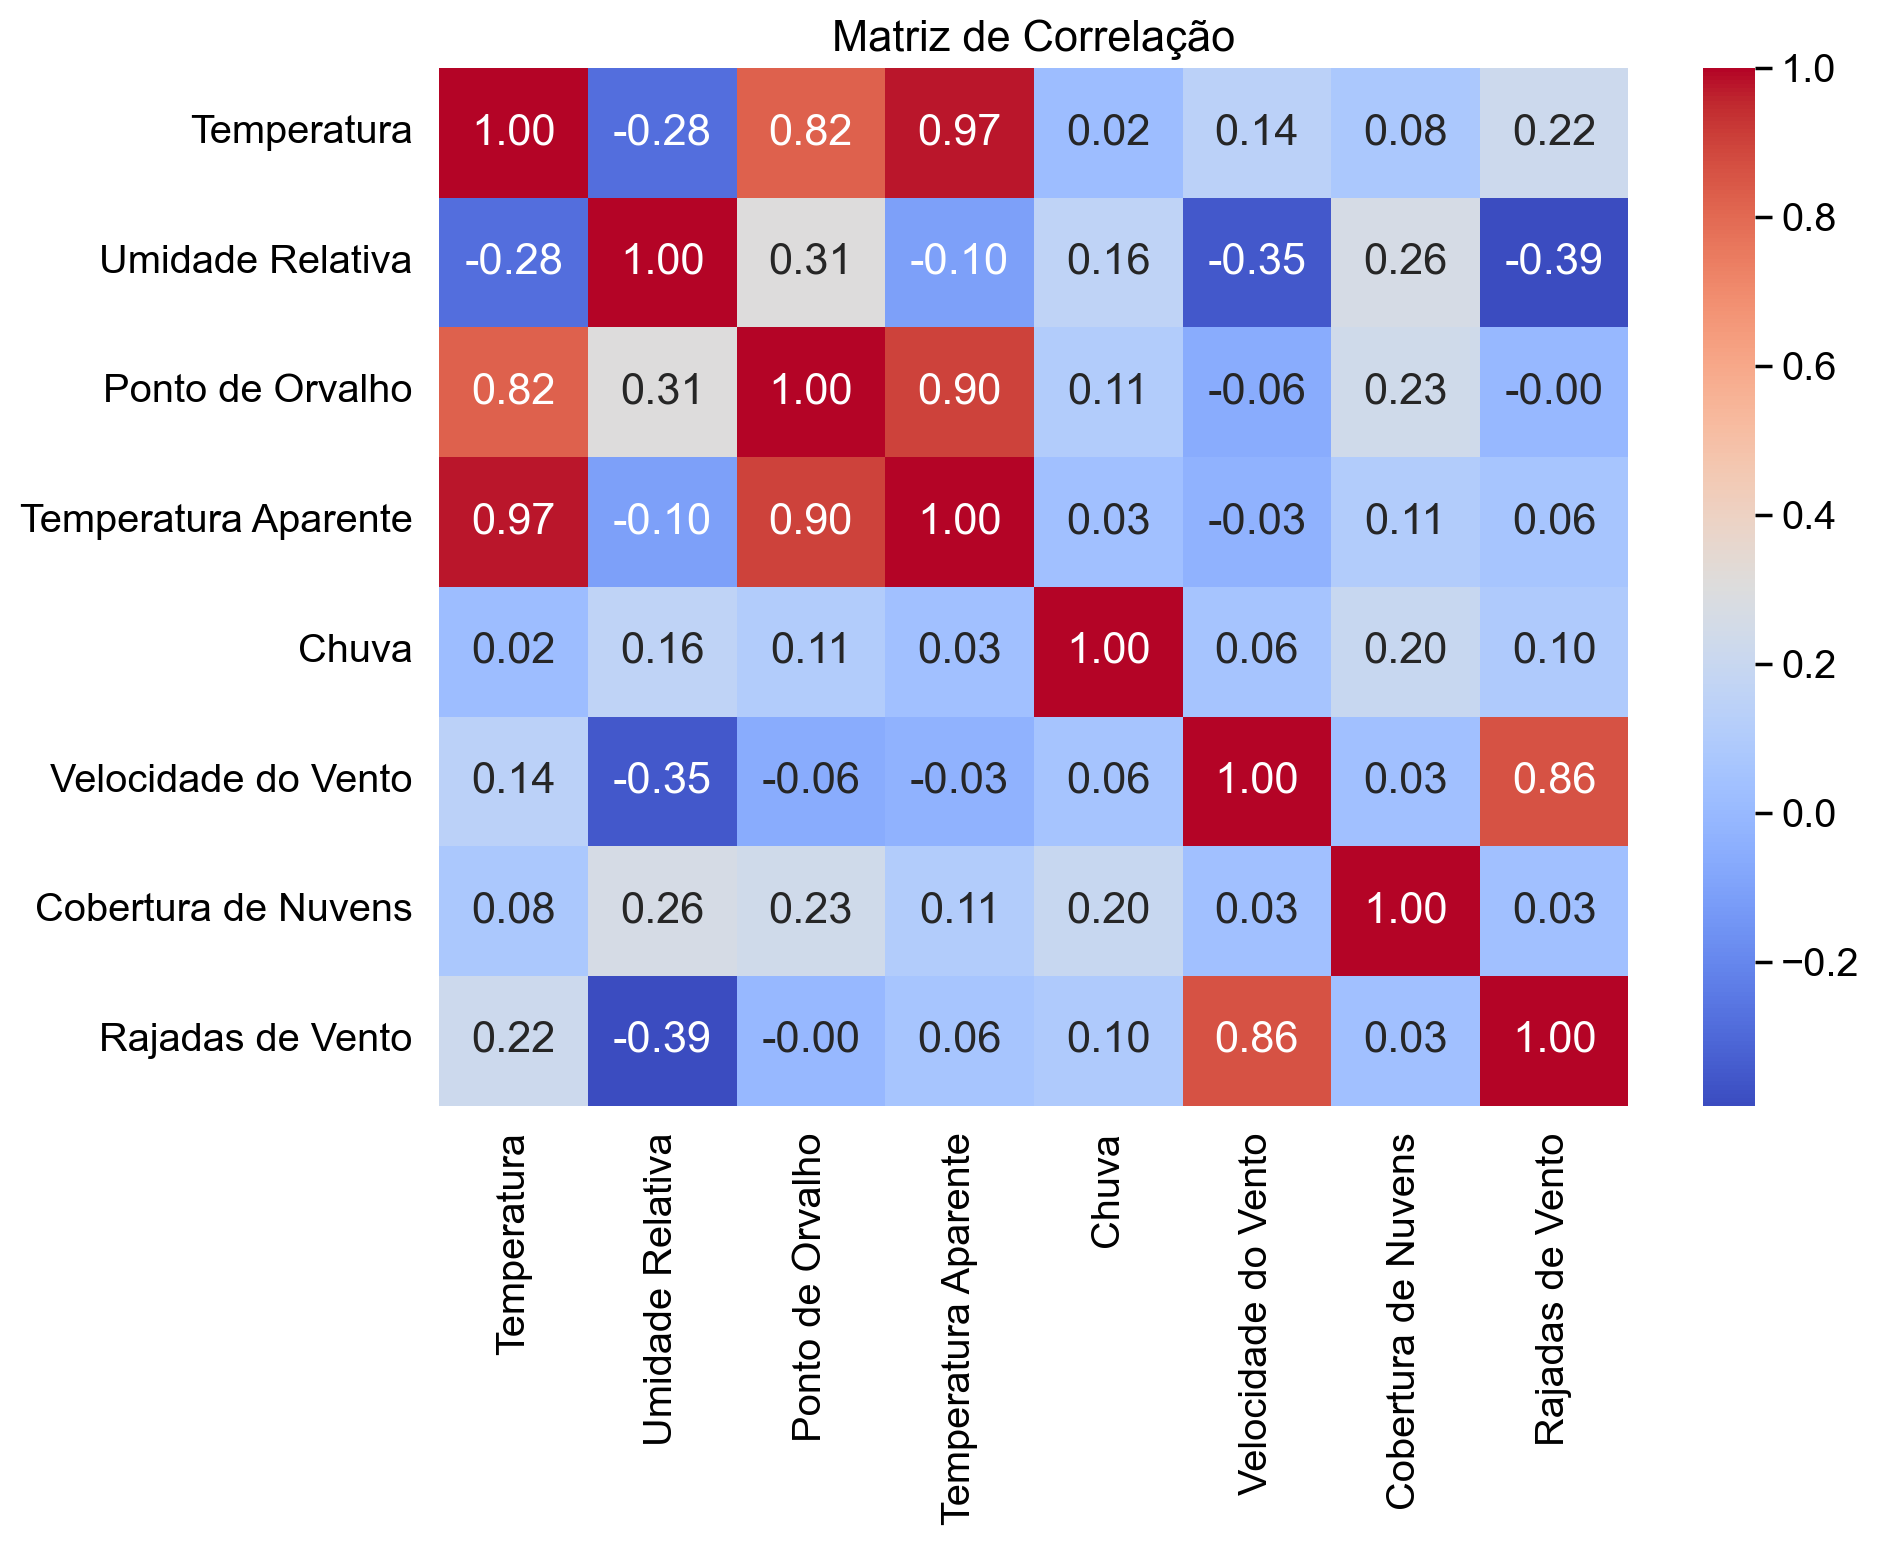

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(open_meteo[list(variaveis.keys())].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.tight_layout()
plt.savefig("../imgs/matriz_correlacao.pdf")
plt.show()

C:\Users\Pichau\AppData\Local\Temp\ipykernel_13892\1885691712.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  media_diaria = open_meteo['Temperatura'].resample('H').mean()


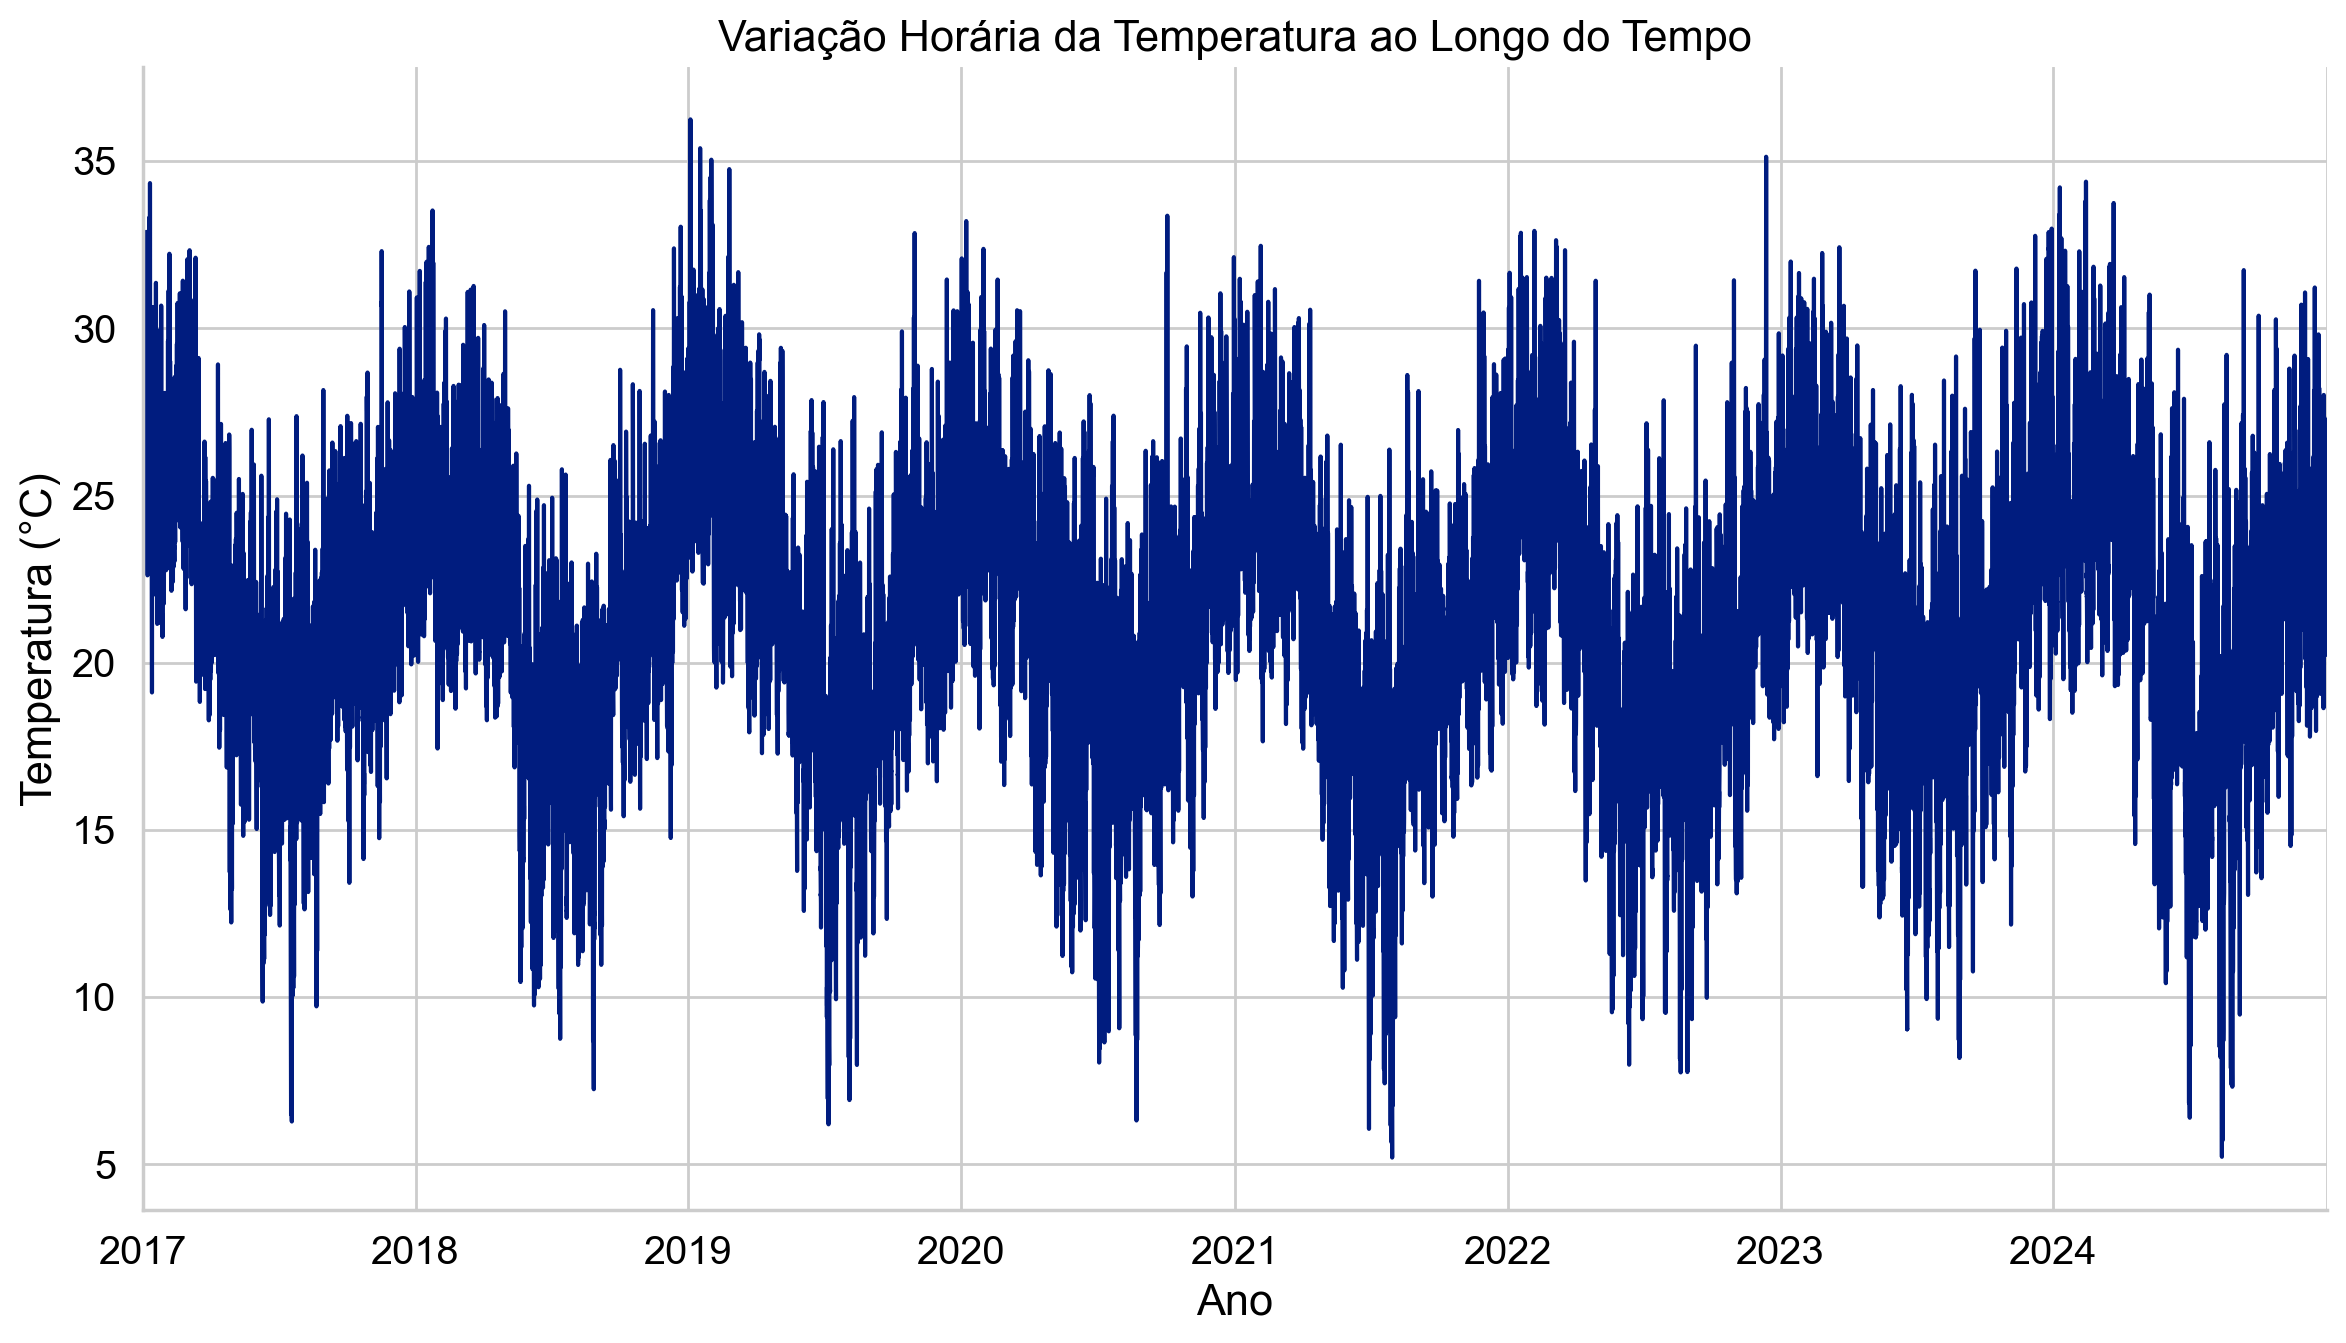

In [25]:
# Média diária da temperatura
media_diaria = open_meteo['Temperatura'].resample('H').mean()

plt.figure(figsize=(12, 7))
media_diaria.plot(kind='line')
plt.title("Variação Horária da Temperatura ao Longo do Tempo")
plt.xlabel("Ano")
plt.ylabel("Temperatura (°C)")
plt.tight_layout()
plt.savefig("../imgs/variacao_temperatura.pdf")
plt.show()

In [16]:
media_diaria.isnull().sum()

0

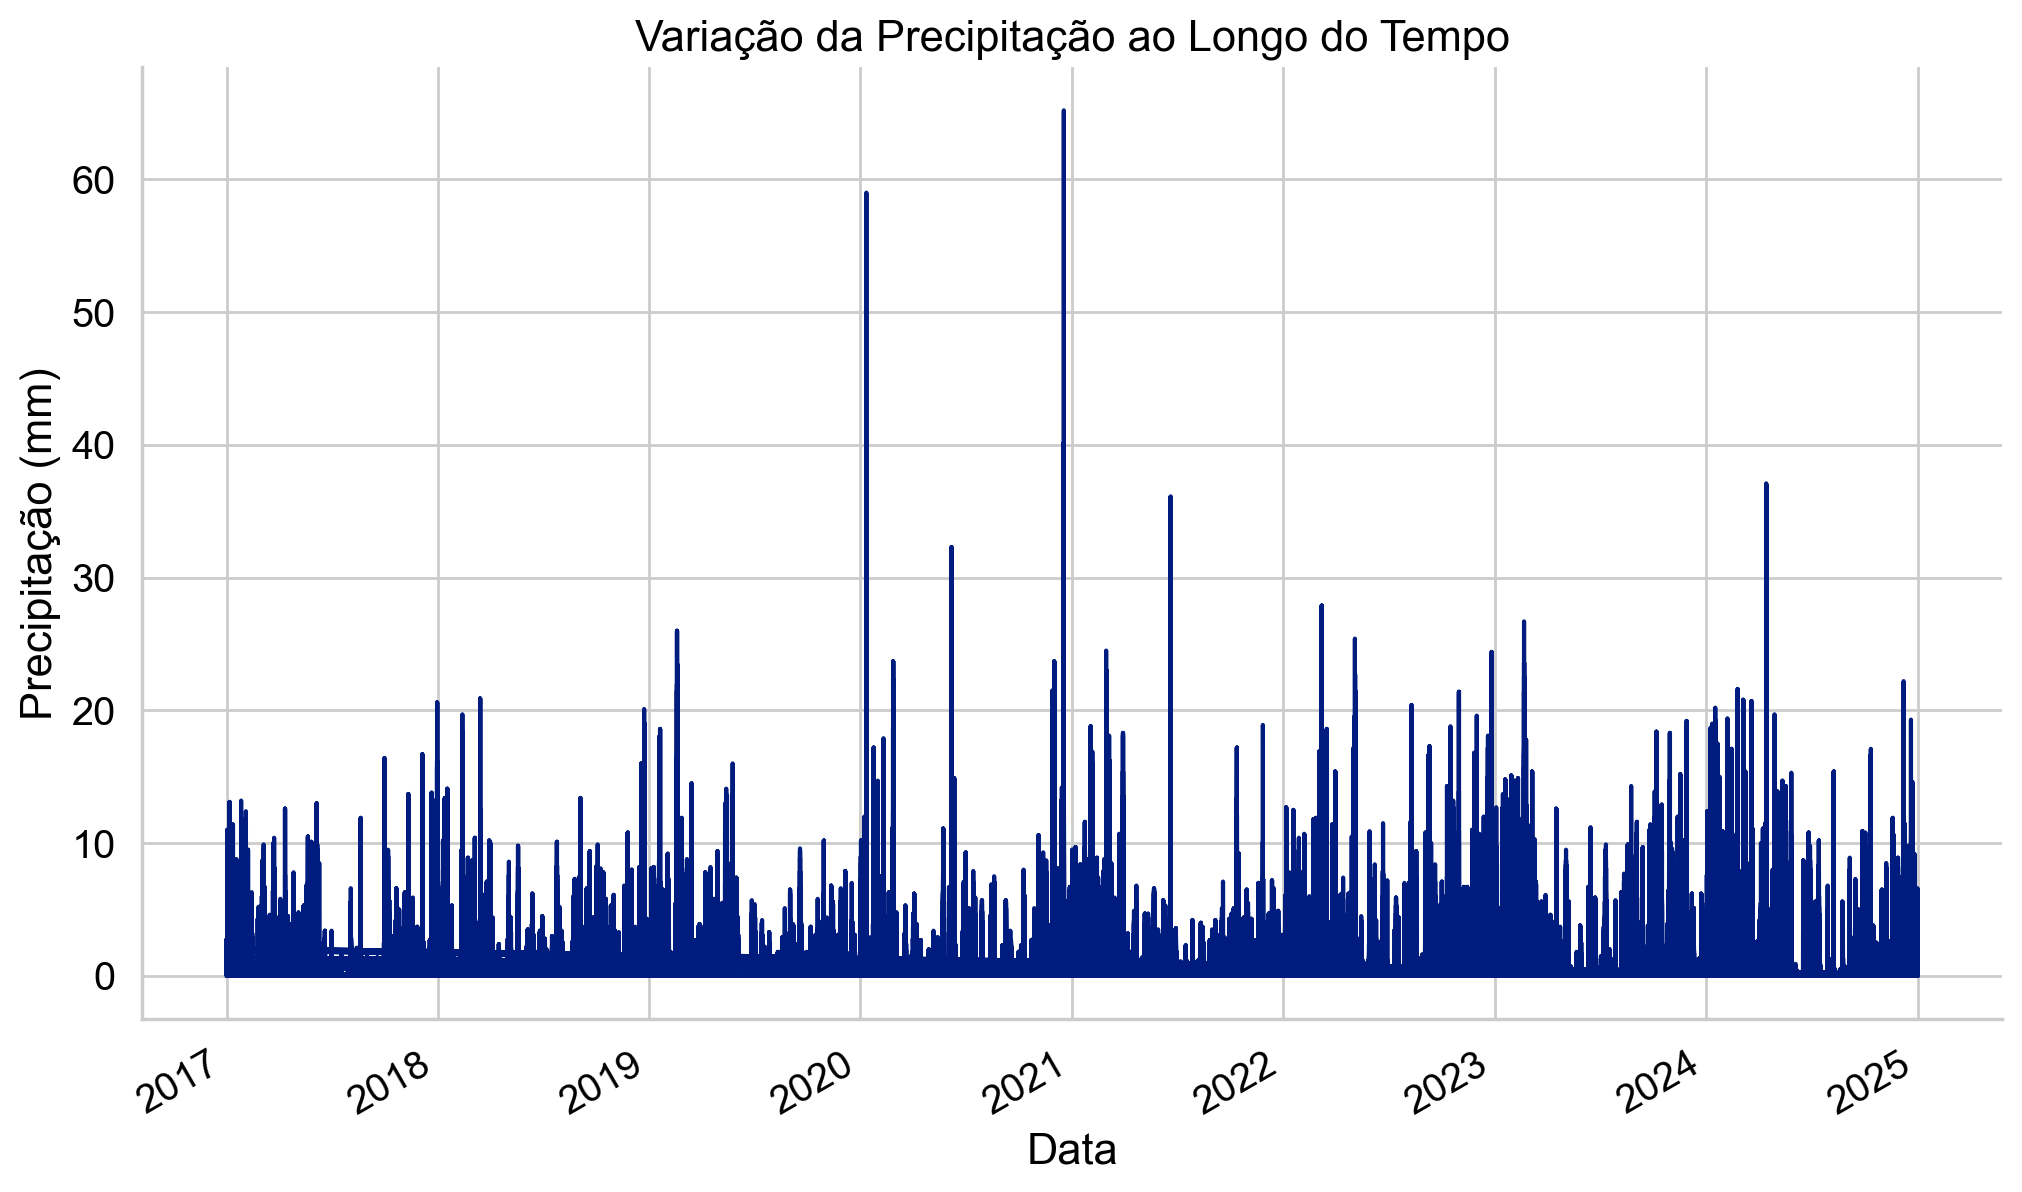

In [19]:
plt.figure(figsize=(12, 7))
open_meteo['Chuva'].plot(kind='line')
plt.title("Variação da Precipitação ao Longo do Tempo")
plt.xlabel("Data")
plt.ylabel("Precipitação (mm)")
plt.show()

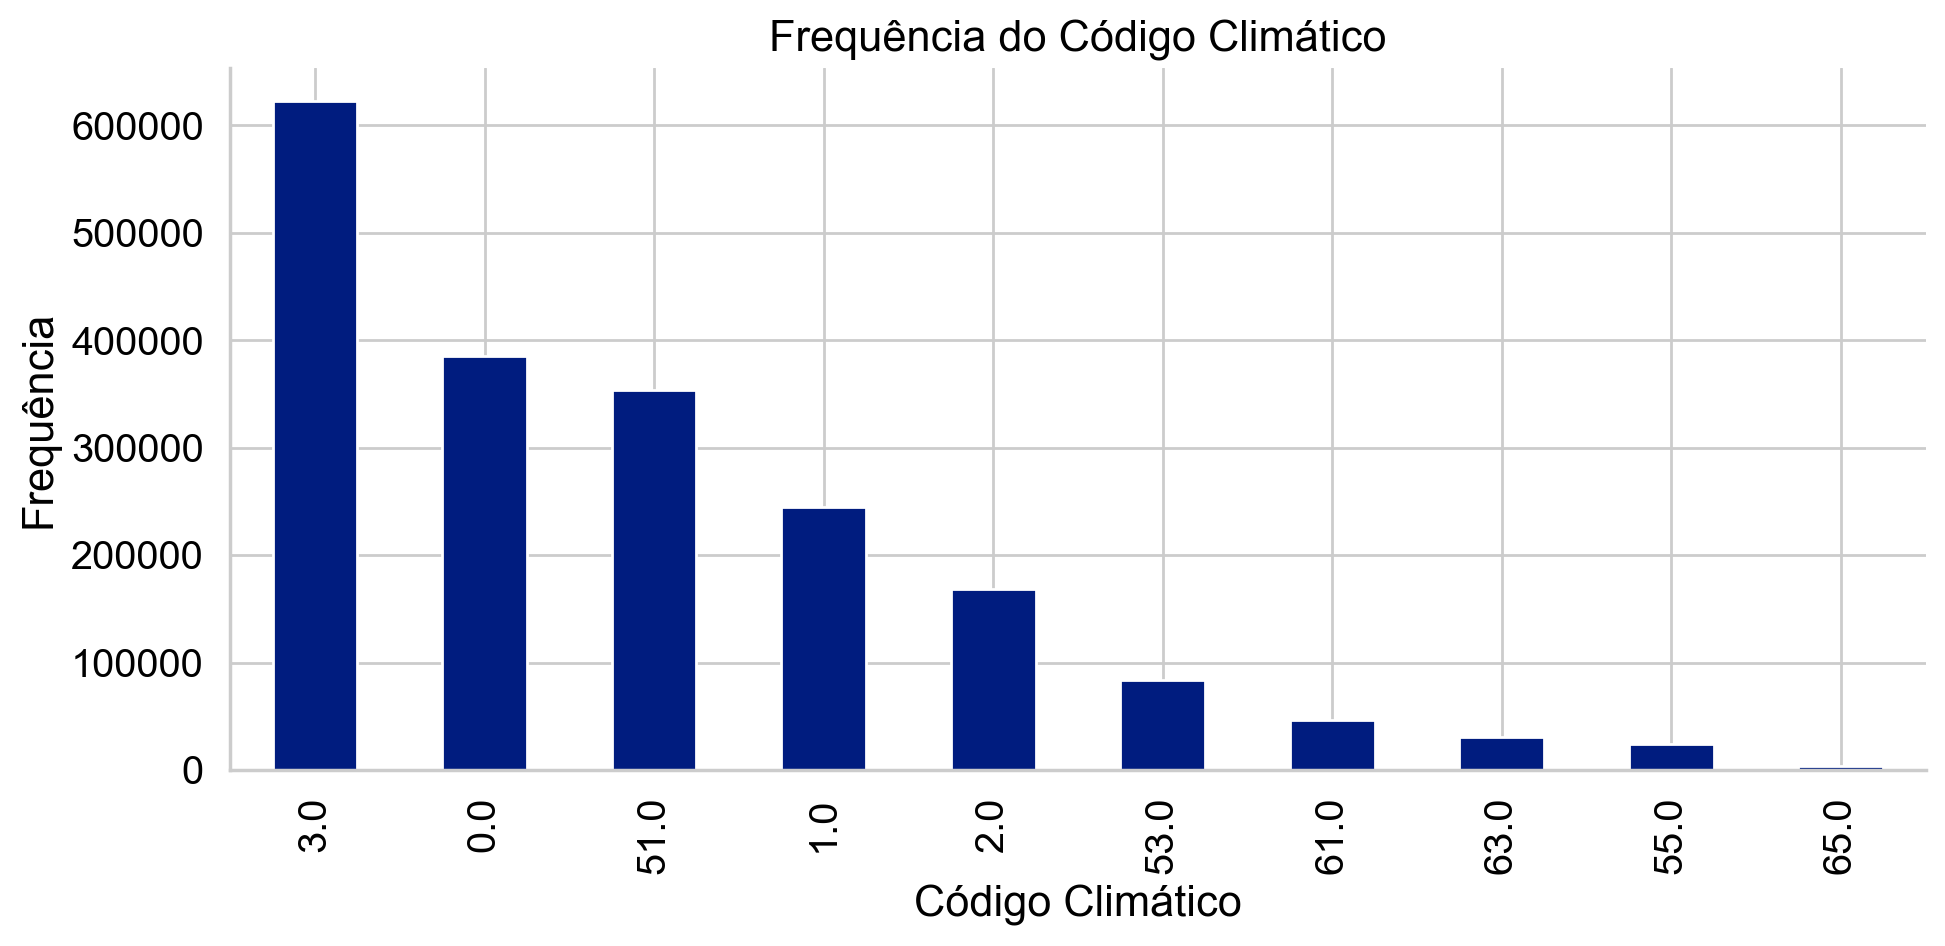

In [13]:
# Frequência dos códigos de tempo
plt.figure(figsize=(10, 5))
open_meteo["weather_code"].value_counts().plot(kind="bar")
plt.title("Frequência do Código Climático")
plt.xlabel("Código Climático")
plt.ylabel("Frequência")
plt.tight_layout()
plt.savefig("../imgs/frequencia_codigo_tempo.pdf")
plt.show()